The intent of this notebook is to compare the average temperture trend in Denver with the world-wide average trend on a monthly basis.  My hypothesis was that Denver cold weather months would not follow the global trends as closely as the warm season months due to changes in air circulation as a result of melting artic sea ice.  See [Melting Artic Sea Ice and Ocean Circulation](https://scied.ucar.edu/longcontent/melting-arctic-sea-ice-and-ocean-circulation)

The data comes from the Kaggle Data Set, [Climate Change: Earth Surface Temperature Data](www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)

The graphs show definite increasing world-wide average temperatures for all months.  For Denver, the increasing trends are less obvious, although the time series for warm-weather months appear to show a more definite increasing trend.  The next step would be to fit curves to the graphs in an effort to more clearly display temperature trends.

In [1]:
import pandas as pd
import csv
import datetime

import matplotlib.pyplot as plt

In [2]:
# From the climate data sets, create times series data frames for World-wide and Denver temperatures.

world_temps = pd.read_csv('data/GlobalTemperatures.csv', index_col='dt', usecols=['dt', 'LandAverageTemperature'], 
                          parse_dates = True)
world_temps.columns = ['temp']
print(world_temps.head())

city_temps = pd.read_csv('data/GlobalLandTemperaturesByCity.csv', index_col='dt', 
                          usecols=['dt', 'AverageTemperature', 'City'], parse_dates = True)
denver_temps = city_temps[city_temps['City'] == 'Denver'].drop('City', axis=1)
denver_temps.columns = ['temp']
print(denver_temps.head())

              temp
dt                
1750-01-01   3.034
1750-02-01   3.083
1750-03-01   5.626
1750-04-01   8.490
1750-05-01  11.573
              temp
dt                
1775-04-01   7.020
1775-05-01  13.388
1775-06-01     NaN
1775-07-01     NaN
1775-08-01     NaN


January


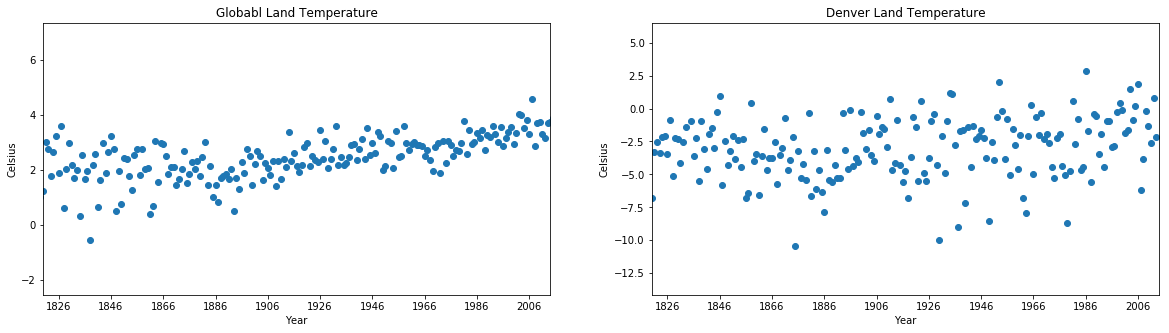

February


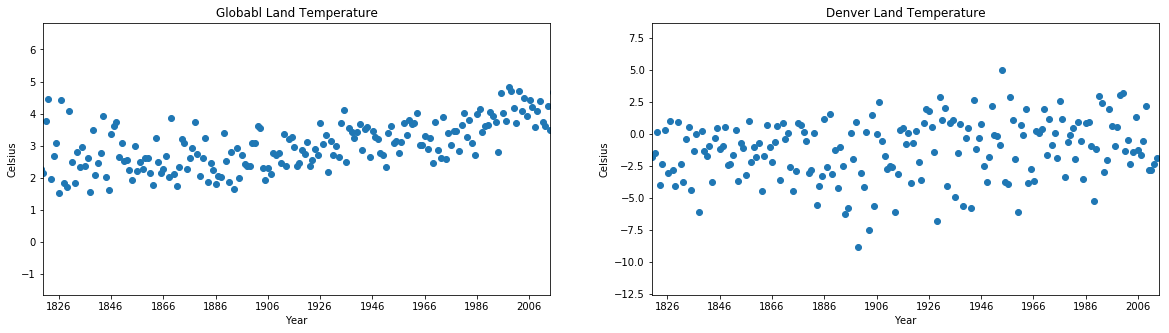

March


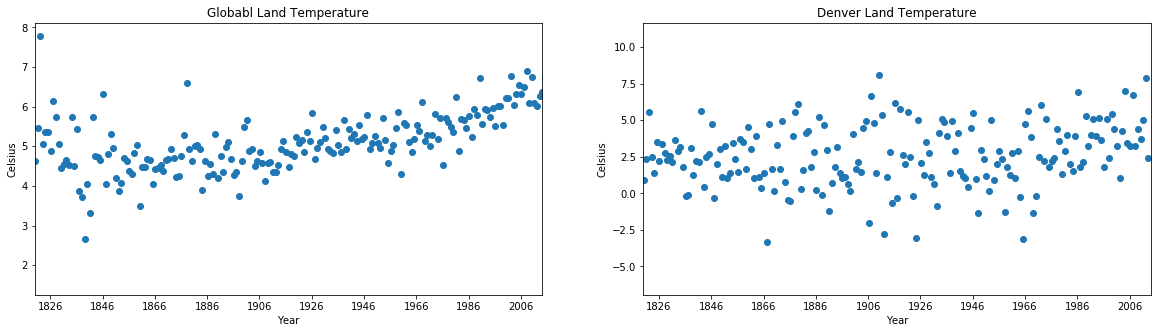

April


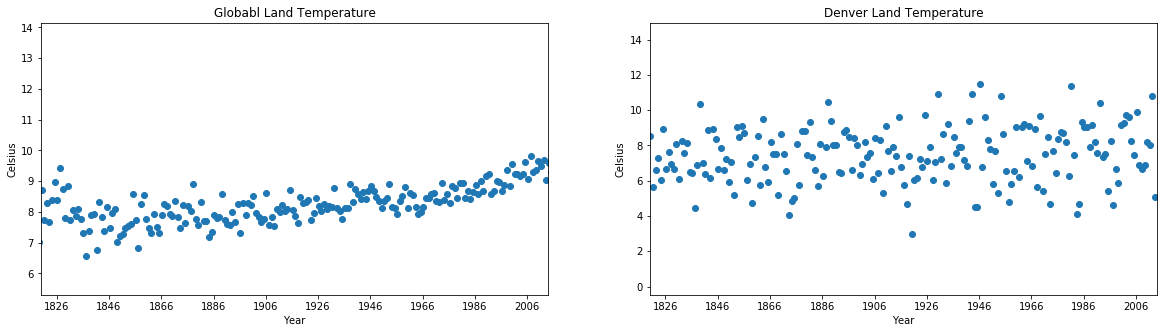

May


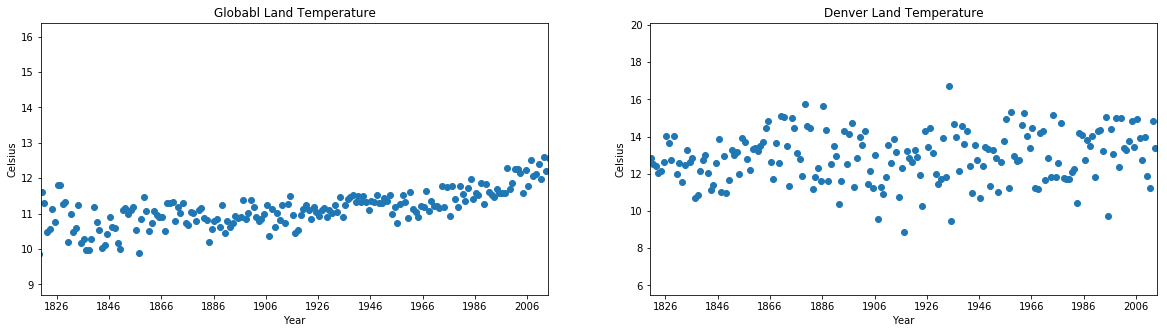

June


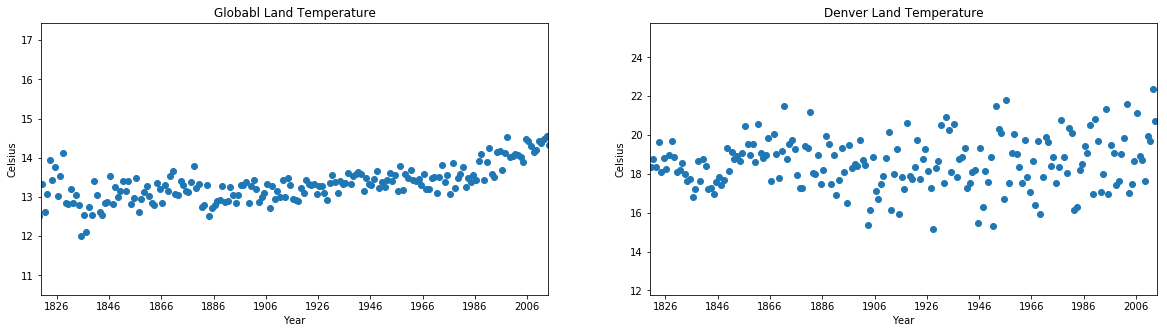

July


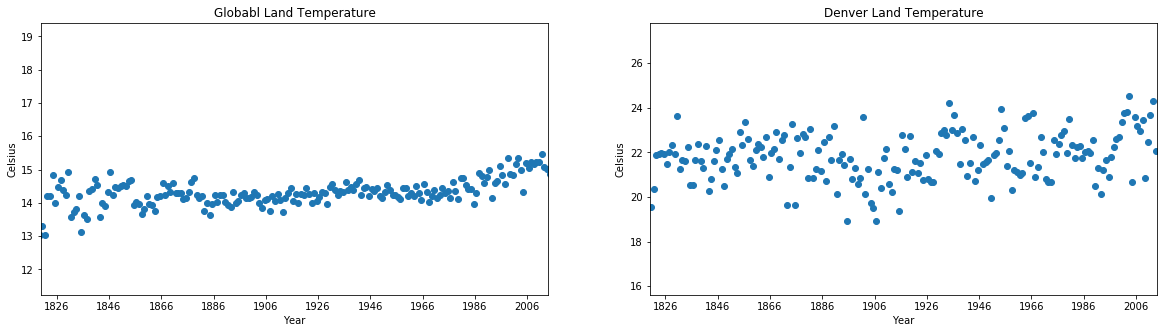

August


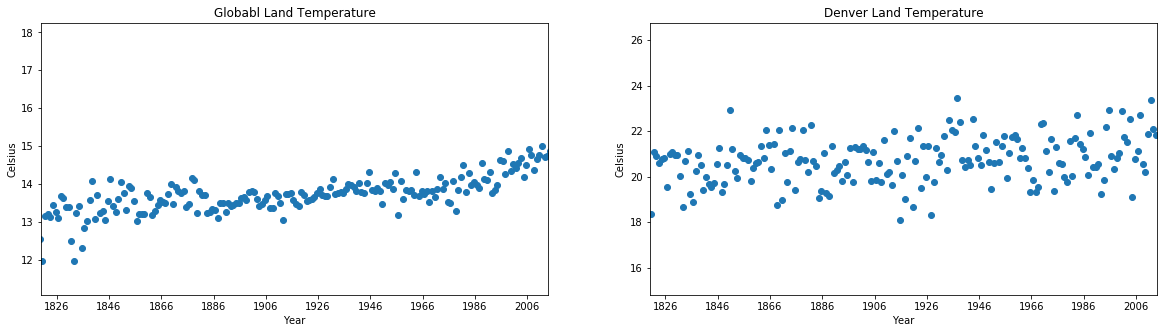

September


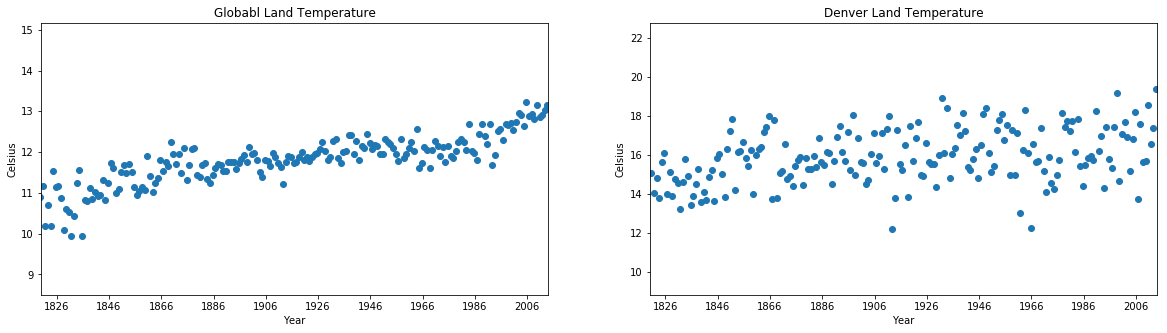

October


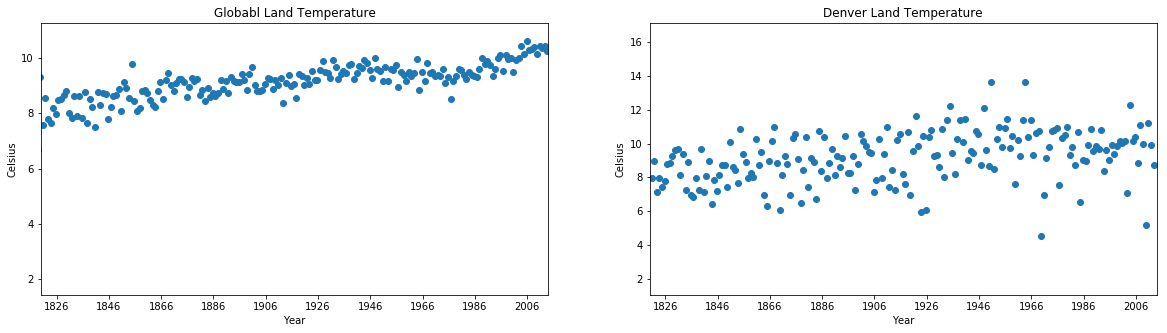

November


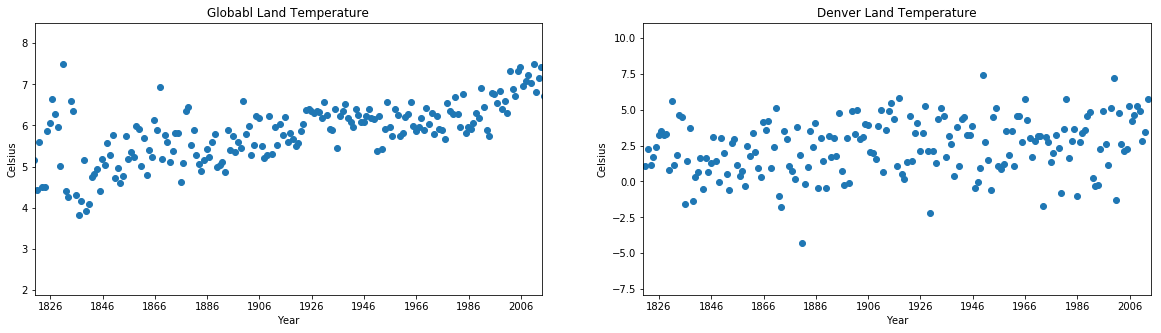

December


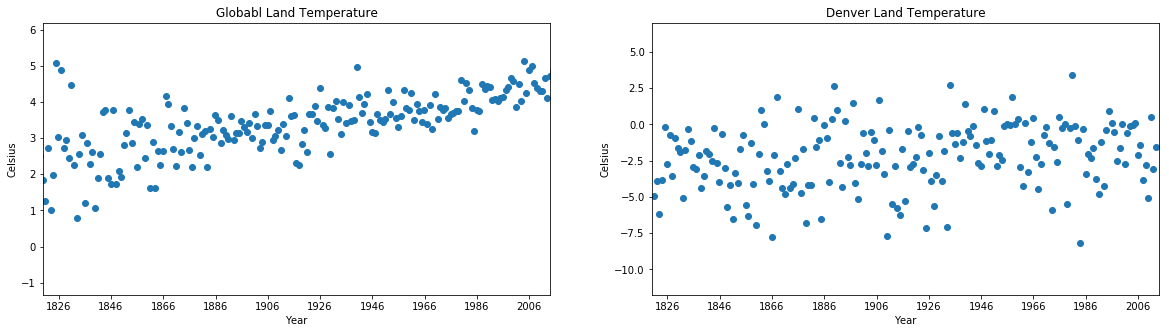

In [3]:
# Group temperatures by month, then graph time series for global and Denver temperatures for each month.

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
         'December']
denver_monthly_temps = denver_temps.groupby(denver_temps.index.month)
world_monthly_temps = world_temps.groupby(world_temps.index.month)

for month in range(1, 13):
    print(month_names[month-1])
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    plt.scatter(x=world_monthly_temps.get_group(month).index, y=world_monthly_temps.get_group(month)['temp'])
    plt.xlim('1820-01-01', '2014-01-01')
    plt.ylabel('Celsius')
    plt.xlabel('Year')
    plt.title('Globabl Land Temperature')
    
    plt.subplot(1, 2, 2)
    plt.scatter(x=denver_monthly_temps.get_group(month).index, y=denver_monthly_temps.get_group(month)['temp'])
    plt.xlim('1820-01-01', '2014-01-01')
    ymin, ymax = plt.ylim()
    plt.ylim(ymin-3, ymax+3)
    plt.ylabel('Celsius')
    plt.xlabel('Year')
    plt.title('Denver Land Temperature')
    plt.show()